In [2]:
import pandas as pd
import numpy as np
import nltk

In [14]:
# !pip install contractions
# !pip install fasttext
# !pip install openpyxl pandas
!pip install xlrd

In [18]:
df= pd.read_csv("https://raw.githubusercontent.com/shardulchavan/Text_Summarization_NLP/master/CustomerReview_Classification_%26_SentimentAnalysis/Amazon-Echo-reviews.csv")

In [19]:
df

,Reviews,Ratings
0,\nThis is an honest review and comparison of t...,Positive
1,\nI have my apartment which is not a small apa...,Positive
2,\nA friend of mine recently gave me an echo. 2...,Positive
3,"\nI have had homepod mini, the original homepo...",Positive
4,\nThe new Echo 4th Gen is a big change in aest...,Positive
...,...,...
4995,\nI like that you can connect with smart devic...,Positive
4996,\nUpgraded from regular echo dot puck style ...,Positive
4997,\nI love the new ball shape. Its pretty and th...,Positive
4998,\neasy to set up and has good sound. have not ...,Positive


In [20]:
df.iloc[:,0]

0       \nThis is an honest review and comparison of t...
1       \nI have my apartment which is not a small apa...
2       \nA friend of mine recently gave me an echo. 2...
3       \nI have had homepod mini, the original homepo...
4       \nThe new Echo 4th Gen is a big change in aest...
                              ...                        
4995    \nI like that you can connect with smart devic...
4996    \nUpgraded  from regular echo dot puck style  ...
4997    \nI love the new ball shape. Its pretty and th...
4998    \neasy to set up and has good sound. have not ...
4999    \nI luv everything abt except I have not yet l...
Name: Reviews, Length: 5000, dtype: object

In [6]:
print(df.shape)
#checking null values
df.isnull().sum()

(5000, 2)


Reviews    18
Ratings     0
dtype: int64

In [7]:
#dropping the null values
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(4982, 2)

In [9]:
df["Reviews"]

0       \nThis is an honest review and comparison of t...
1       \nI have my apartment which is not a small apa...
2       \nA friend of mine recently gave me an echo. 2...
3       \nI have had homepod mini, the original homepo...
4       \nThe new Echo 4th Gen is a big change in aest...
                              ...                        
4995    \nI like that you can connect with smart devic...
4996    \nUpgraded  from regular echo dot puck style  ...
4997    \nI love the new ball shape. Its pretty and th...
4998    \neasy to set up and has good sound. have not ...
4999    \nI luv everything abt except I have not yet l...
Name: Reviews, Length: 4982, dtype: object

Preprocessing

In [10]:
#Removing Contractions
import contractions
df_no_contracts= df["Reviews"].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()
df_no_contracts

0       [This, is, an, honest, review, and, comparison...
1       [I, have, my, apartment, which, is, not, a, sm...
2       [A, friend, of, mine, recently, gave, me, an, ...
3       [I, have, had, homepod, mini,, the, original, ...
4       [The, new, Echo, 4th, Gen, is, a, big, change,...
                              ...                        
4995    [I, like, that, you, can, connect, with, smart...
4996    [Upgraded, from, regular, echo, dot, puck, sty...
4997    [I, love, the, new, ball, shape., Its, pretty,...
4998    [easy, to, set, up, and, has, good, sound., ha...
4999    [I, love, everything, about, except, I, have, ...
Name: Reviews, Length: 4982, dtype: object

In [11]:
df['Reviews_Str'] = [' '.join(map(str, l)) for l in df_no_contracts]
df.head()

,Reviews,Ratings,Reviews_Str
0,\nThis is an honest review and comparison of t...,Positive,This is an honest review and comparison of the...
1,\nI have my apartment which is not a small apa...,Positive,I have my apartment which is not a small apart...
2,\nA friend of mine recently gave me an echo. 2...,Positive,A friend of mine recently gave me an echo. 2nd...
3,"\nI have had homepod mini, the original homepo...",Positive,"I have had homepod mini, the original homepod,..."
4,\nThe new Echo 4th Gen is a big change in aest...,Positive,The new Echo 4th Gen is a big change in aesthe...


In [12]:
#Tokenization
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
df['Reviews_Str'] =  df['Reviews_Str'].apply(word_tokenize)
df.head()

,Reviews,Ratings,Reviews_Str
0,\nThis is an honest review and comparison of t...,Positive,"[This, is, an, honest, review, and, comparison..."
1,\nI have my apartment which is not a small apa...,Positive,"[I, have, my, apartment, which, is, not, a, sm..."
2,\nA friend of mine recently gave me an echo. 2...,Positive,"[A, friend, of, mine, recently, gave, me, an, ..."
3,"\nI have had homepod mini, the original homepo...",Positive,"[I, have, had, homepod, mini, ,, the, original..."
4,\nThe new Echo 4th Gen is a big change in aest...,Positive,"[The, new, Echo, 4th, Gen, is, a, big, change,..."


In [13]:
#Lower casing
df['Reviews_Str'] = df['Reviews_Str'].apply(lambda x: [word.lower() for word in x])
df.head()

,Reviews,Ratings,Reviews_Str
0,\nThis is an honest review and comparison of t...,Positive,"[this, is, an, honest, review, and, comparison..."
1,\nI have my apartment which is not a small apa...,Positive,"[i, have, my, apartment, which, is, not, a, sm..."
2,\nA friend of mine recently gave me an echo. 2...,Positive,"[a, friend, of, mine, recently, gave, me, an, ..."
3,"\nI have had homepod mini, the original homepo...",Positive,"[i, have, had, homepod, mini, ,, the, original..."
4,\nThe new Echo 4th Gen is a big change in aest...,Positive,"[the, new, echo, 4th, gen, is, a, big, change,..."


In [14]:
#removing punctuation
import string
punc = string.punctuation
df['Reviews_Str'] = df['Reviews_Str'].apply(lambda x: [word for word in x if word not in punc])
df.tail()

,Reviews,Ratings,Reviews_Str
4995,\nI like that you can connect with smart devic...,Positive,"[i, like, that, you, can, connect, with, smart..."
4996,\nUpgraded from regular echo dot puck style ...,Positive,"[upgraded, from, regular, echo, dot, puck, sty..."
4997,\nI love the new ball shape. Its pretty and th...,Positive,"[i, love, the, new, ball, shape, its, pretty, ..."
4998,\neasy to set up and has good sound. have not ...,Positive,"[easy, to, set, up, and, has, good, sound, hav..."
4999,\nI luv everything abt except I have not yet l...,Positive,"[i, love, everything, about, except, i, have, ..."


In [15]:
# nltk.download('stopwords')

In [16]:
#removing stop words
stop_words = set(stopwords.words('english'))
df['Reviews_Str'] = df['Reviews_Str'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Reviews,Ratings,Reviews_Str
0,\nThis is an honest review and comparison of t...,Positive,"[honest, review, comparison, new, 4th, generat..."
1,\nI have my apartment which is not a small apa...,Positive,"[apartment, small, apartment, loft, well, 12-y..."
2,\nA friend of mine recently gave me an echo. 2...,Positive,"[friend, mine, recently, gave, echo, 2nd, gen...."
3,"\nI have had homepod mini, the original homepo...",Positive,"[homepod, mini, original, homepod, echo, first..."
4,\nThe new Echo 4th Gen is a big change in aest...,Positive,"[new, echo, 4th, gen, big, change, aesthetics,..."


In [17]:
#POS tagging
df['POS tagging'] = df['Reviews_Str'].apply(nltk.tag.pos_tag)
df.head()

,Reviews,Ratings,Reviews_Str,POS tagging
0,\nThis is an honest review and comparison of t...,Positive,"[honest, review, comparison, new, 4th, generat...","[(honest, JJS), (review, NN), (comparison, NN)..."
1,\nI have my apartment which is not a small apa...,Positive,"[apartment, small, apartment, loft, well, 12-y...","[(apartment, NN), (small, JJ), (apartment, NN)..."
2,\nA friend of mine recently gave me an echo. 2...,Positive,"[friend, mine, recently, gave, echo, 2nd, gen....","[(friend, NN), (mine, NN), (recently, RB), (ga..."
3,"\nI have had homepod mini, the original homepo...",Positive,"[homepod, mini, original, homepod, echo, first...","[(homepod, NN), (mini, NN), (original, JJ), (h..."
4,\nThe new Echo 4th Gen is a big change in aest...,Positive,"[new, echo, 4th, gen, big, change, aesthetics,...","[(new, JJ), (echo, JJ), (4th, CD), (gen, NN), ..."


In [18]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_wordnet_pos = df['POS tagging'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
print(df.head(2))
print('\nPOS tagging for Word lemmatizer\n')
print(df_wordnet_pos)

                                             Reviews   Ratings  \
0  \nThis is an honest review and comparison of t...  Positive   
1  \nI have my apartment which is not a small apa...  Positive   

                                         Reviews_Str  \
0  [honest, review, comparison, new, 4th, generat...   
1  [apartment, small, apartment, loft, well, 12-y...   

                                         POS tagging  
0  [(honest, JJS), (review, NN), (comparison, NN)...  
1  [(apartment, NN), (small, JJ), (apartment, NN)...  

POS tagging for Word lemmatizer

0       [(honest, a), (review, n), (comparison, n), (n...
1       [(apartment, n), (small, a), (apartment, n), (...
2       [(friend, n), (mine, n), (recently, r), (gave,...
3       [(homepod, n), (mini, n), (original, a), (home...
4       [(new, a), (echo, a), (4th, n), (gen, n), (big...
                              ...                        
4995    [(like, n), (connect, a), (smart, a), (devices...
4996    [(upgraded, a), (re

In [19]:
#Lemmatization using WordNet
lem = WordNetLemmatizer()
df_lemma= df_wordnet_pos.apply(lambda x: [lem.lemmatize(word, tag) for word, tag in x])
df['Reviews_Str']=[' '.join(map(str, l)) for l in df_lemma]
df.head()

,Reviews,Ratings,Reviews_Str,POS tagging
0,\nThis is an honest review and comparison of t...,Positive,honest review comparison new 4th generation ec...,"[(honest, JJS), (review, NN), (comparison, NN)..."
1,\nI have my apartment which is not a small apa...,Positive,apartment small apartment loft well 12-year-ol...,"[(apartment, NN), (small, JJ), (apartment, NN)..."
2,\nA friend of mine recently gave me an echo. 2...,Positive,friend mine recently give echo 2nd gen. think ...,"[(friend, NN), (mine, NN), (recently, RB), (ga..."
3,"\nI have had homepod mini, the original homepo...",Positive,homepod mini original homepod echo first party...,"[(homepod, NN), (mini, NN), (original, JJ), (h..."
4,\nThe new Echo 4th Gen is a big change in aest...,Positive,new echo 4th gen big change aesthetic design e...,"[(new, JJ), (echo, JJ), (4th, CD), (gen, NN), ..."


In [20]:
#Saved Preprocessed data to .csv file
# df.to_csv('Processed Amazon Echo reviews.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [21]:
new_df=pd.read_csv('https://raw.githubusercontent.com/shardulchavan/Text_Summarization_NLP/master/CustomerReview_Classification_%26_SentimentAnalysis/Processed%20Amazon%20Echo%20reviews.csv')

In [22]:
print(new_df.shape)
new_df.head()

(4982, 5)


,Unnamed: 0,Reviews,Ratings,Reviews_Str,POS tagging
0,0,\nThis is an honest review and comparison of t...,Positive,honest review comparison new 4th generation ec...,"[('honest', 'JJS'), ('review', 'NN'), ('compar..."
1,1,\nI have my apartment which is not a small apa...,Positive,apartment small apartment loft well 12-year-ol...,"[('apartment', 'NN'), ('small', 'JJ'), ('apart..."
2,2,\nA friend of mine recently gave me an echo. 2...,Positive,friend mine recently give echo 2nd gen. think ...,"[('friend', 'NN'), ('mine', 'NN'), ('recently'..."
3,3,"\nI have had homepod mini, the original homepo...",Positive,homepod mini original homepod echo first party...,"[('homepod', 'NN'), ('mini', 'NN'), ('original..."
4,4,\nThe new Echo 4th Gen is a big change in aest...,Positive,new echo 4th gen big change aesthetic design e...,"[('new', 'JJ'), ('echo', 'JJ'), ('4th', 'CD'),..."


In [11]:
#Checking null values in pre-processed data
new_df.isnull().sum()

Unnamed: 0     0
Reviews        0
Ratings        0
Reviews_Str    3
POS tagging    0
dtype: int64

In [12]:
new_df.dropna(axis=0,inplace=True)

In [13]:
new_df.isnull().sum()

Unnamed: 0     0
Reviews        0
Ratings        0
Reviews_Str    0
POS tagging    0
dtype: int64

C:\Users\chava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='count'>

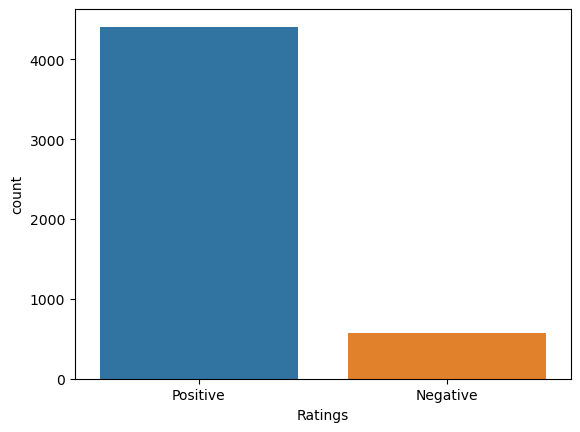

In [15]:
#no. of postive and negative review samples
import seaborn as sns
sns.countplot(new_df['Ratings'])

In [27]:
X=new_df.iloc[:,-2]

In [28]:
y=new_df.iloc[:,2]

In [29]:
#Splitting train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,shuffle=True)

In [30]:
pd.DataFrame(X_train).reset_index(inplace = True)
pd.DataFrame(y_train).reset_index(inplace = True)

In [31]:
#Duplicating negative samples to overcome class imbalance
neg = y_train[y_train=="Negative"]
y_train = pd.concat([y_train, neg, neg])

In [32]:
R = X_train.loc[list(neg.index)]
X_train = pd.concat([X_train, R, R])

In [33]:
# # y_train.loc[y_train['Ratings']==Negative]
# for i in y_train['Ratings']:
#     if i==Negative:
#         y_train_extra.loc[i]

    

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4901,)
(996,)
(4901,)
(996,)


In [35]:
#implementing CountVectorization
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# X_train_counts.shape

In [36]:
#implementing TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = X_train
X_train = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


array(['00', '000', '020', ..., 'éxito', 'único', 'útil'], dtype=object)

In [37]:

X_test = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()


array(['00', '000', '020', ..., 'éxito', 'único', 'útil'], dtype=object)

In [38]:
X_test = pd.DataFrame(X_test.toarray())

In [39]:
X_train = pd.DataFrame(X_train.toarray())

In [40]:
print(X_train.shape)
print(X_test.shape)

(4901, 7431)
(996, 7431)


In [41]:
#Fitting Multinomial model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.6).fit(X_train, y_train)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
np.mean(y_pred==y_test)

0.9166666666666666

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.39      0.73      0.51        59
    Positive       0.98      0.93      0.95       937

    accuracy                           0.92       996
   macro avg       0.69      0.83      0.73       996
weighted avg       0.95      0.92      0.93       996



In [74]:
from sklearn.naive_bayes import BernoulliNB

In [80]:
#Fitting Bernoulli model
clf2 = BernoulliNB()
clf2=clf.fit(X_train, y_train)

In [83]:
y_pred2=clf2.predict(X_test)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

    Negative       0.50      0.38      0.43       145
    Positive       0.90      0.94      0.92       851

    accuracy                           0.85       996
   macro avg       0.70      0.66      0.67       996
weighted avg       0.84      0.85      0.85       996



In [77]:
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import string

In [54]:
#Func to test model on new data
def txt_preprocessing(text):
    lst = []
    sentence = text.lower()
    words = word_tokenize(sentence)
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in words if not w in stop_words] 
    separator = ", "
    filtered_sentence=separator.join(filtered_sentence)
    filtered_sentence = filtered_sentence.split()
    s = ""
    for x in filtered_sentence:
        s = s.join(x)
    lst.append(s)
    txt=vectorizer.transform(lst)
    vectorizer.get_feature_names_out()
    return txt

In [66]:
text="Amazing product, works handfree. Sometimes doesnt listen but helps a lot with reminders"
txt=txt_preprocessing(text)
print(txt)

  (0, 4568)	0.7070707336494138
  (0, 2419)	0.010097288396374653
  (0, 739)	0.7070707336494138


In [67]:
clf.predict(txt)

array(['Positive'], dtype='<U8')